****************************

<font size=4 color='darkslategray'>Titanic Survival Prediction: Data Preparation & EDA

********************************
**<font size=4 color='skyblue'>Objective</font>**: The goal of this notebook is to clean, preprocess, and analyze the Titanic dataset. We will transform the raw data into a clean, numerical format suitable for a machine learning model to predict passenger survival.

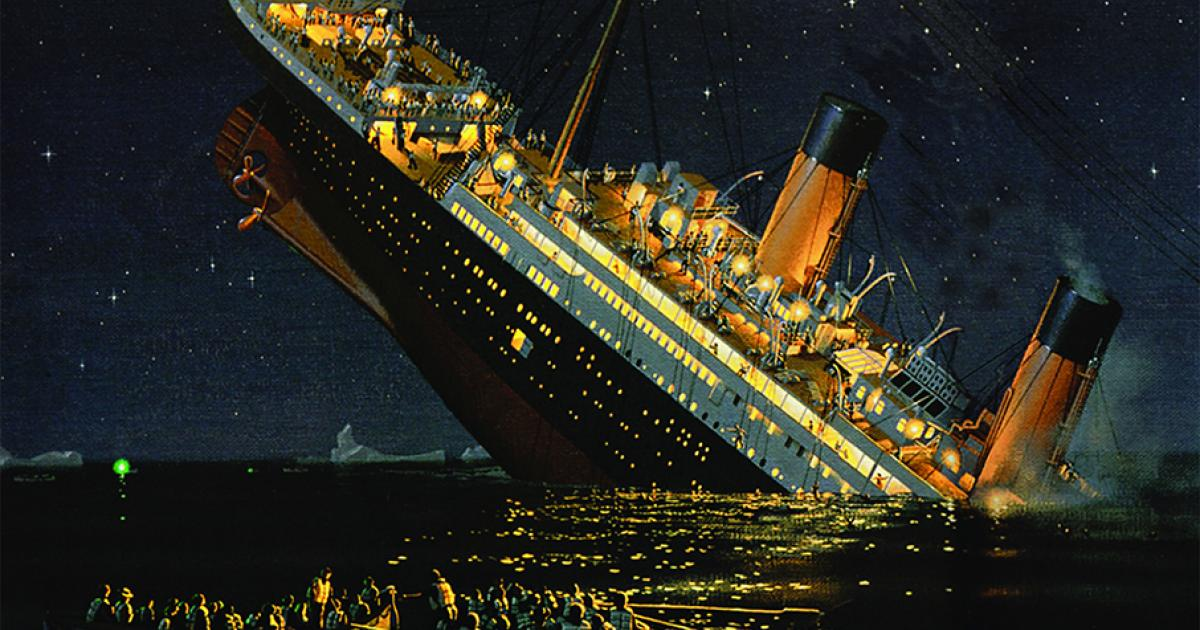

In [1]:
#********************
#IMPORT LIBRARIES
#********************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
np.random.seed(42)

<font size=5 color='cyan'> Data Overview and Initial Exploration

-------------------------

Before diving into preprocessing and modeling, it's crucial to get a good understanding of the dataset. This involves checking the basic information about the data, looking at the first few rows, examining the data types of each column, and getting a statistical summary.

The code below loads the dataset and displays its shape and the first few rows, giving us an initial glimpse into the data structure and content.

In [2]:
# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
print(f'The dataset is loaded with shape : {df.shape}')
print('The Initial Data Snapshot:')
df.head()

The dataset is loaded with shape : (891, 12)
The Initial Data Snapshot:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<font size=5 color='cyan'>Column Names

----------------
It's helpful to list all the column names in the dataset to know what features are available for analysis and modeling. The following code prints out each column name.

In [3]:
# Columns in Dataset
for columns in df.columns:
  print(f'- {columns}')

- PassengerId
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked


<font size=5 color='cyan'> Data Types

-------------------------
Understanding the data type of each attribute is important for knowing how to handle them during preprocessing. This code provides a summary of the column names, their non-null counts, and their data types (e.g., int64, float64, object).

In [4]:
# Data type of each attribute of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font size=5 color='cyan'> Numeric Columns

----------------
Identifying the numerical columns is necessary for statistical analysis and certain preprocessing steps like scaling or correlation analysis. This code snippet filters and prints the names of columns with an integer data type.

In [5]:
# Numeric Columns in the dataframe
numeric_columns = df.select_dtypes(include='int64')
print('The Numeric columns in the dataframe : \n')
for column in numeric_columns:
  print('-', column)

The Numeric columns in the dataframe : 

- PassengerId
- Survived
- Pclass
- SibSp
- Parch


<font size=5 color='cyan'> Dataset Shape and Statistical Summary

--------------------
Getting the shape of the dataset (number of rows and columns) and a statistical summary provides a quick overview of the data's dimensions and basic statistics for numerical columns (like mean, standard deviation, min, max, etc.) and counts for categorical columns. The `describe(include='all')` function gives a comprehensive summary for all column types.

In [6]:
# Data Overview
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} Columns.')
print(f'The Statistical Details of the data : ')
df.describe(include='all')

The dataset contains 891 rows and 12 Columns.
The Statistical Details of the data : 


PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000  891.000000     891  891.000000   204      889  
unique         NaN         NaN         NaN     681         NaN   147        3  
top            NaN         NaN         NaN  347082         NaN    G6        S  
freq           NaN         NaN         NaN       7         NaN     4      644  
mean     29.699118    0.523008    0.381594     NaN   32.204208   NaN      NaN  
std      14.526497    1.102743    0.806057     NaN   49.693429   NaN      NaN  
min       0.420000    0.000000    0.000000     NaN    0.000000   NaN      NaN  
25%      20.125000    0.000000    0.000000     NaN    7.910400   NaN      NaN  
50%      28.000000    0.000000    0.000000     NaN   14.454200   NaN      NaN  
75%      38.000000    1.000000    0.000000     NaN   31.000000   NaN      NaN  
max      80.000000    8.000000    6.000000     NaN  512.329200   NaN      NaN

<font size=5 color='cyan'> Exploratory Data Analysis (EDA)

--------------------
In this section, we perform exploratory data analysis to understand the characteristics of the dataset, identify patterns, and visualize relationships between features.

<font size=5 color='cyan'>  Missing Data Overview

------------------------
We first examine the extent of missing values in each column to understand which features require imputation or further handling.

In [7]:
# --- Exploratory Data Analysis (EDA) ---
# Overview of missing data
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_df.style.background_gradient(cmap='Reds')

<font size=5 color='cyan'>  Visualizing Missing Data

----------------------
A heatmap provides a visual representation of the missing data, making it easier to identify columns with a high number of missing values. The colors indicate the presence (or absence) of data points.

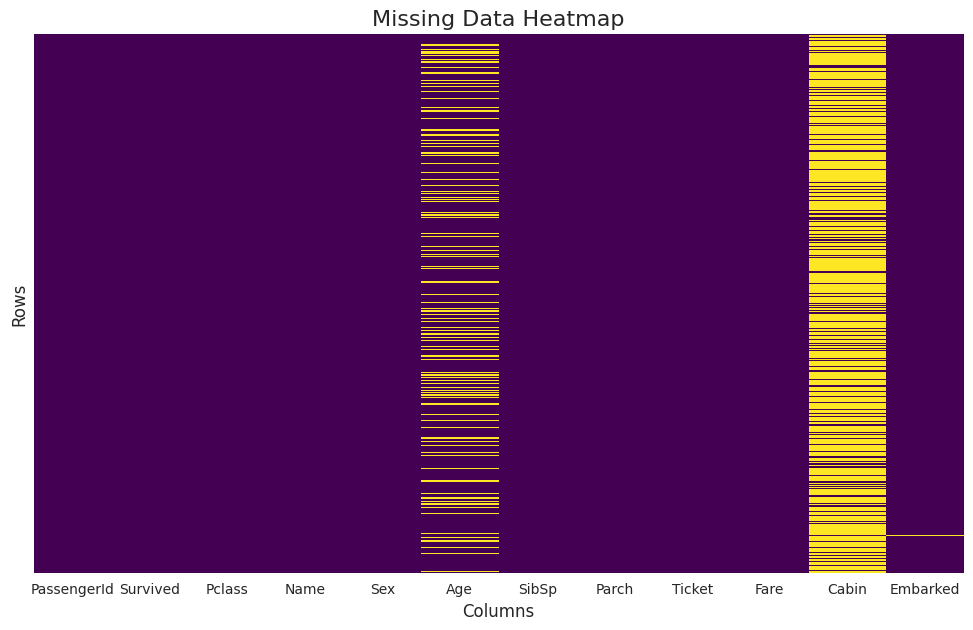

In [8]:
# Visualize missing data with heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()


<font size=5 color='cyan'>  Target Variable Distribution

------------------
We visualize the distribution of the target variable 'Survived' using a countplot to see the proportion of passengers who survived versus those who did not. This helps us understand if the dataset is balanced or imbalanced with respect to the target variable.

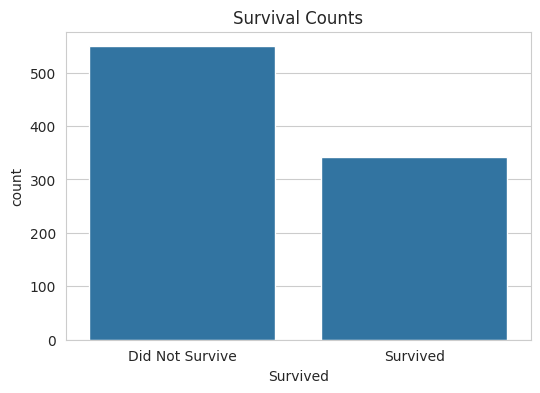

In [9]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.show()


<font size=5 color='cyan'>  Age Distribution by Survival

--------------------------
We plot the distribution of 'Age' for both survived and non-survived passengers using kernel density estimation plots. This visualization helps us understand if there are different age patterns among those who survived and those who did not. We can observe if certain age groups had a higher or lower chance of survival.

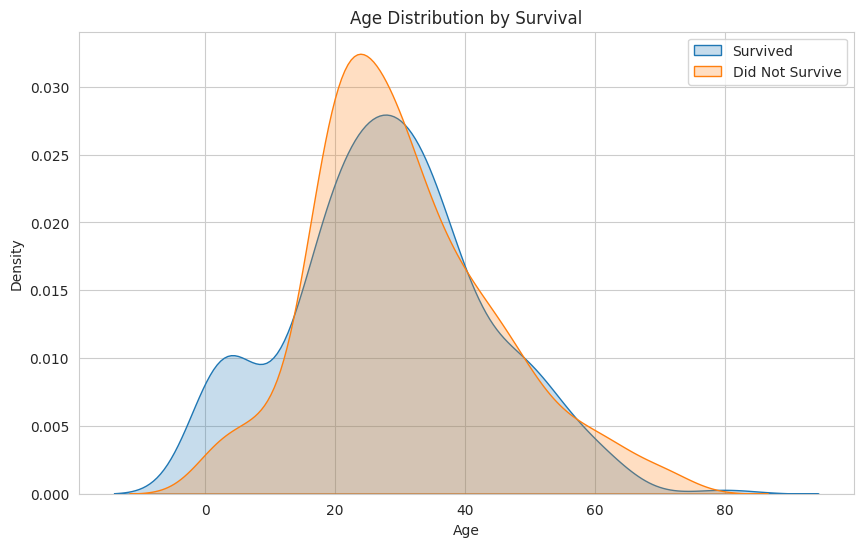

In [10]:
# Age distribution by survival
plt.figure(figsize=(10,6))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'].dropna(), label='Survived', shade=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'].dropna(), label='Did Not Survive', shade=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()


<font size=5 color='cyan'>  Fare Distribution by Survival

---------------------
We use a boxplot to compare the distribution of 'Fare' for survived and non-survived passengers. This plot shows the median, quartiles, and potential outliers of the fare for each survival group, helping us understand if the fare paid is related to survival. Higher fares might be associated with different passenger classes and, consequently, different survival rates.

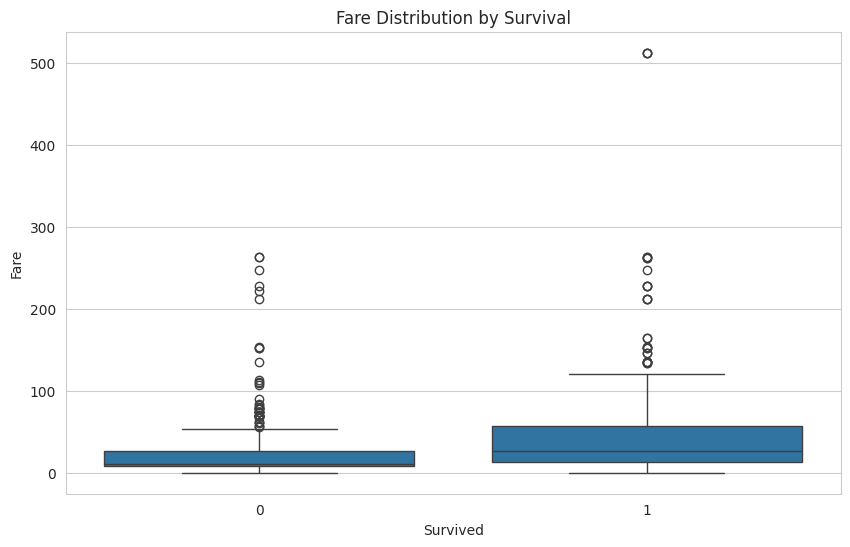

In [11]:
# Fare distribution by survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

<font size=5 color='cyan'>  Correlation Matrix

-------------------------
We generate a correlation matrix to visualize the linear relationships between the numerical features in the dataset. The heatmap shows the correlation coefficients between pairs of numerical columns. Values close to 1 or -1 indicate a strong positive or negative linear correlation, respectively, while values close to 0 indicate a weak correlation. This helps in identifying potential multicollinearity among features and understanding how individual features relate to the target variable 'Survived'.

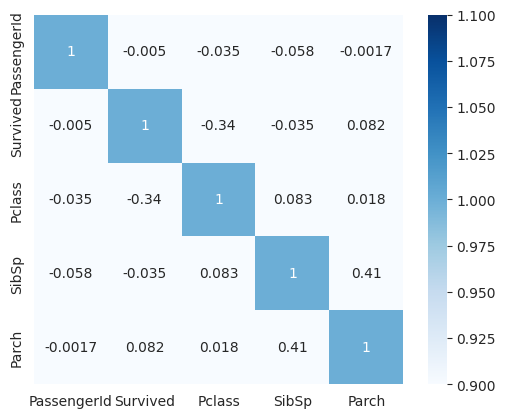

In [12]:
# Select only numeric columns for correlation matrix
corr = numeric_columns.corr()
sns.heatmap(corr,vmin = 1.0, vmax=1.0 , square=True, annot=True, cmap='Blues')
plt.show()

<font size=5 color='paleturquoise'>  Checking for Imbalance Data in the Target Variable</font>


Data is Imbalanced

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<font size=5 color='cyan'>  Data Preprocessing and Feature Engineering

--------------------
In this section, we will preprocess the data to prepare it for machine learning model training. This involves handling missing values, creating new informative features, encoding categorical variables, and scaling numerical features.

<font size=5 color='cyan'>  Handling Missing Values

-------------------
We identified that the 'Age', 'Fare', and 'Embarked' columns contain missing values. To address this, we will impute these missing values using appropriate strategies:

- **Age**: Imputed with the median age to handle missing numerical data without being heavily affected by outliers.
- **Fare**: Imputed with the mean fare.
- **Embarked**: Imputed with the mode (most frequent) value, as it is a categorical feature.

<font size=5 color='cyan'>  Feature Engineering

------------------
We will create new features from existing ones to potentially capture more complex relationships in the data and improve model performance:

- **FamilySize**: Calculated as the sum of 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) plus one (for the passenger themselves). This represents the total number of family members.
- **IsAlone**: A binary feature indicating whether a passenger is traveling alone (FamilySize = 1) or with family.
- **Title**: Extracted from the 'Name' column, representing the passenger's title (e.g., Mr., Mrs., Miss, Master). Rare titles are grouped into a single 'Rare' category.
- **FarePerPerson**: Calculated by dividing the 'Fare' by the 'FamilySize'. This represents the cost of the ticket per family member.

In [14]:
# Feature Engineering
# Create 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone'
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with a common one
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create 'FarePerPerson'
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

print("New features created:")
display(df[['FamilySize', 'IsAlone', 'Title', 'FarePerPerson']].head())

New features created:


FamilySize  IsAlone Title  FarePerPerson
0           2        0    Mr        3.62500
1           2        0   Mrs       35.64165
2           1        1  Miss        7.92500
3           2        0   Mrs       26.55000
4           1        1    Mr        8.05000

<font size=5 color='cyan'>  Handling Categorical Features

------------
Categorical features ('Sex', 'Embarked', and 'Title') need to be converted into a numerical format that machine learning models can understand. We will use one-hot encoding for this purpose. One-hot encoding creates new binary columns for each unique category in the feature.

In [15]:
# Handle Categorical Features
# Select categorical columns for encoding
categorical_features = ['Sex', 'Embarked', 'Title']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("DataFrame after one-hot encoding:")
display(df.head())

DataFrame after one-hot encoding:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  FamilySize  IsAlone  FarePerPerson  \
0         A/5 21171   7.2500   NaN           2        0        3.62500   
1          PC 17599  71.2833   C85           2        0       35.64165   
2  STON/O2. 3101282   7.9250   NaN           1        1        7.92500   
3            113803  53.1000  C123           2        0       26.55000   
4            373450   8.0500   NaN           1        1        8.05000   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False

<font size=5 color='cyan'>  Scaling Numerical Features

---------------------------
Numerical features ('Age', 'Fare', 'FamilySize', and 'FarePerPerson') have different scales, which can affect the performance of some machine learning algorithms. We will use `StandardScaler` to standardize these features by removing the mean and scaling to unit variance.

In [16]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling (excluding the target variable and PassengerId)
numerical_features = ['Age', 'Fare', 'FamilySize', 'FarePerPerson']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("DataFrame after scaling numerical features:")
display(df.head())

DataFrame after scaling numerical features:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.530377      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.571831      1      0   
2                             Heikkinen, Miss. Laina -0.254825      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.365167      1      0   
4                           Allen, Mr. William Henry  0.365167      0      0   

             Ticket      Fare Cabin  FamilySize  IsAlone  FarePerPerson  \
0         A/5 21171 -0.502445   NaN    0.059160        0      -0.454798   
1          PC 17599  0.786845   C85    0.059160        0       0.438994   
2  STON/O2. 3101282 -0.488854   NaN   -0.560975        1      -0.334757   
3            113803  0.420730  C123    0.059160        0       0.185187   
4            373450 -0.486337   NaN   -0.560975        1      -0.331267   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False

<font size=5 color='cyan'>  Preprocessing Pipeline

-------------------
To streamline the preprocessing steps and ensure consistency, we will create a preprocessing pipeline using `ColumnTransformer`. This pipeline combines the imputation, encoding, and scaling steps and can be easily applied to the training and testing data.

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Define numerical and categorical features
numerical_features = ['Age', 'Fare', 'FamilySize', 'FarePerPerson']
categorical_features = ['Sex', 'Embarked', 'Title']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like PassengerId, Survived, Pclass, SibSp, Parch, Ticket, Cabin, Name)
)

print("Preprocessing pipeline created.")

Preprocessing pipeline created.
